# Name
### Amirhossein Amirzadehirani
# Student Number
### 3143092

# Clustering with kmeans

## Download California housing Dataset

In [1]:
from sklearn.datasets import fetch_california_housing
 
df = fetch_california_housing(as_frame=True).frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Choose appropriate features
- Pick just the "Longitude", "Latitude" and "MedHouseVal" columns of the dataset

In [2]:
df = df[["Latitude", "Longitude", "MedHouseVal"]] 

## Implement kmeans using sklearn
- You will be using the default initialization for kmeans namely: "kmeans++"
- The following will be done in a single for statement
  - You are going to train 6 k-means clustering algorithms with different k's. Specifically k=[5, 6, 7, 8, 9, 10]
  - You will print the following:
    - The plots for each k
    - These will be seaborn scatterplots
    - You will create 6 subplots
    - The Latitude will be the y's
    - The Longitude's will be the x's
    - Use random_state=0
    - The MedianHouseValue will serve as the size of each point to let us know which clusters have the houses with the highest value
      - Bigger points will mean bigger MedianHouseValue
    - The inertia for each k (grab these in a list, you will need them later for plotting)
    - The Silhoutte score for each k (grab these in a list, you will need them later plotting) 

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import copy

datasets = []
inertias, sillhouettes = {}, {}
for k in range(5,11):
    print(f"{k} clusters are generating.")
    model = KMeans(n_clusters=k, init="k-means++", random_state=0)
    model.fit(df)
    clusters = model.predict(df)
    inertias[k] = model.inertia_
    sillhouettes[k] = silhouette_score(df, clusters)
    df_cp = copy.deepcopy(df)
    df_cp["clusters"] = clusters
    datasets.append(df_cp)
    print(f"Inertia for {k} is: {inertias[k]}")
    print(f"Silhouette score for {k} is: {sillhouettes[k]}")
    print(f"{k} clusters has generated.")



5 clusters are generating.
Inertia for 5 is: 24564.872223293503
Silhouette score for 5 is: 0.4431691617660009
5 clusters has generated.
6 clusters are generating.
Inertia for 6 is: 20940.28278749702
Silhouette score for 6 is: 0.4125422481265153
6 clusters has generated.
7 clusters are generating.
Inertia for 7 is: 17586.94709621131
Silhouette score for 7 is: 0.41201410572288283
7 clusters has generated.
8 clusters are generating.
Inertia for 8 is: 15349.528106571748
Silhouette score for 8 is: 0.4045329003429535
8 clusters has generated.
9 clusters are generating.
Inertia for 9 is: 13564.129356771416
Silhouette score for 9 is: 0.3828984762006003
9 clusters has generated.
10 clusters are generating.
Inertia for 10 is: 12518.135931292321
Silhouette score for 10 is: 0.39115572741148774
10 clusters has generated.


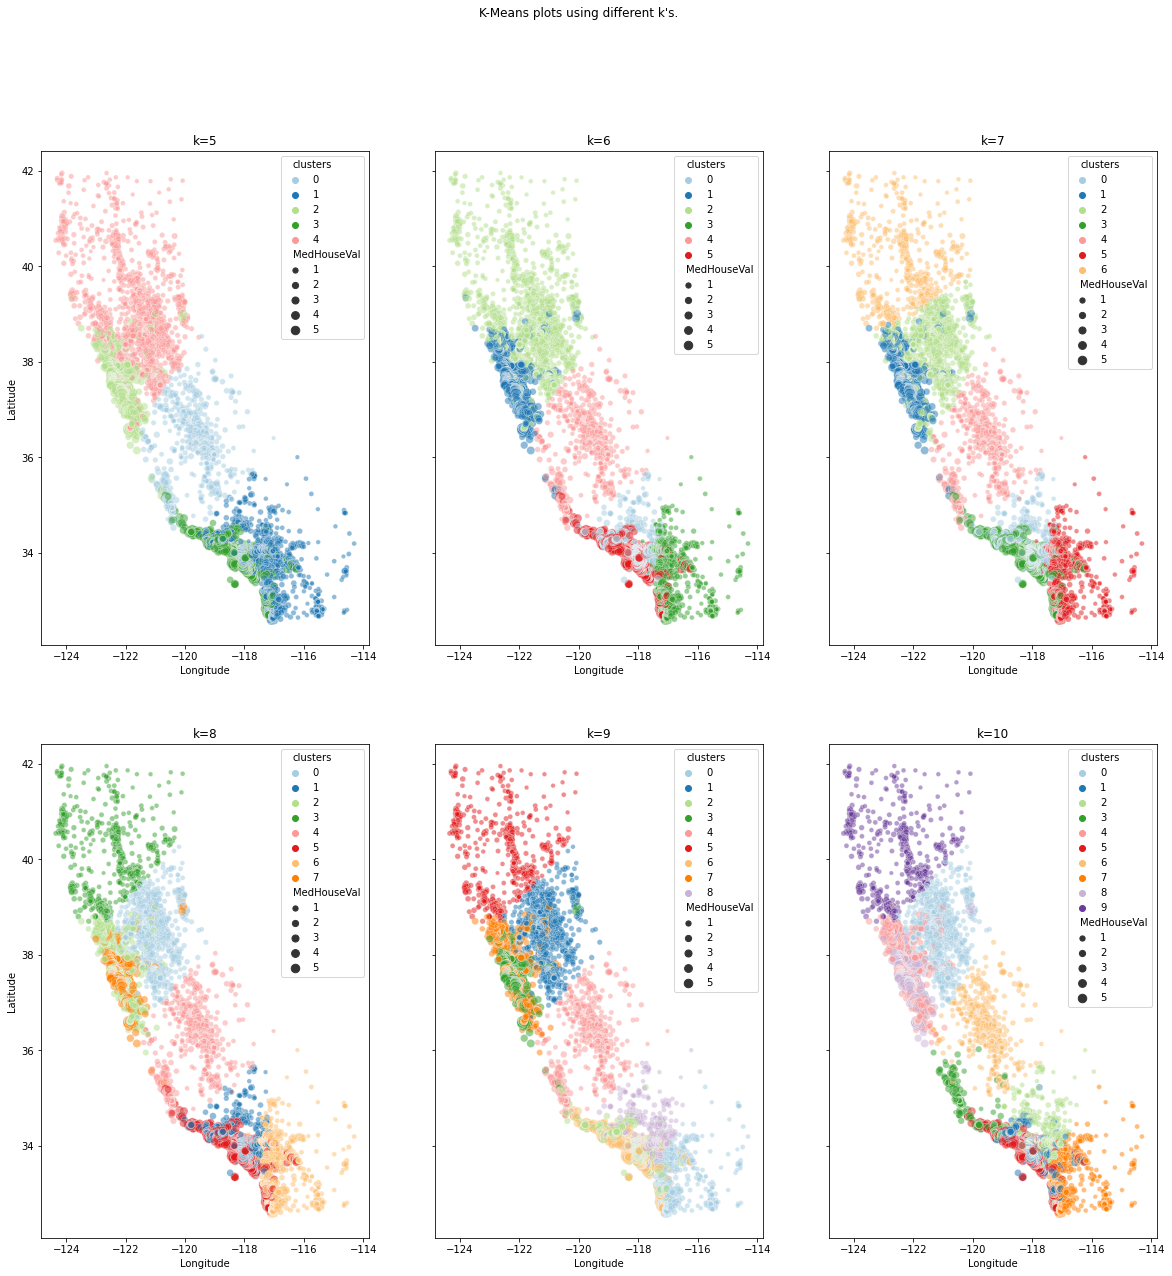

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axes = plt.subplots(2,3, figsize=(20,20), sharey=True)
fig.suptitle("K-Means plots using different k's. ")

for i in range(2):
    for j in range(3):
        sns.scatterplot(ax=axes.flatten()[2*i+j+1 if i==1 else 2*i+j], 
                        data=datasets[2*i+j+1 if i==1 else 2*i+j],
                        # [0][0] 0 2*0+0=0
                        # [0][1] 1 2*0+1=1
                        # [0][2] 2 2*0+2=2
                        # [1][0] 3 2*1+0+1=3
                        # [1][1] 4 2*1+1+1=4
                        # [1][2] 5 2*1+2+1=5
                        x="Longitude", y="Latitude",
                        size="MedHouseVal", hue="clusters",
                        palette="Paired", alpha=0.5) 
        axes[i][j].set_title(f"k={(2*i+j+1 if i==1 else 2*i+j)+5}")


## Plot the inertia's against k's

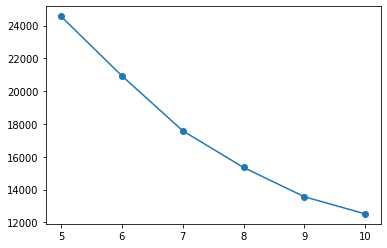

In [5]:
plt.plot(list(inertias.keys()), list(inertias.values()), marker="o")
plt.show()

## Plot the silhoutte score against k's

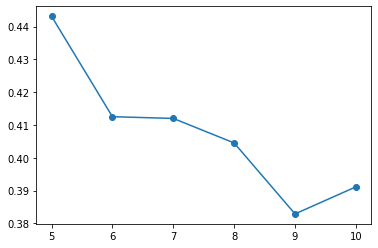

In [6]:
plt.plot(list(sillhouettes.keys()), list(sillhouettes.values()), marker="o")
plt.show()

# Dimensionality reduction with PCA

## Download Breast Cancer dataset from sklearn

In [7]:
from sklearn.datasets import load_breast_cancer

df = load_breast_cancer(as_frame=True).frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
x = df.drop("target", axis=1)
y = df.target

## Implement pca using sklearn

## Perform feature scaling using StandardScaler before applying PCA
 - Print the shape of your scaled data

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_scl = scaler.transform(x)
x_scl.shape

(569, 30)

## Reduce all features to 2 components
    - Plot a 2D graph with pc1 as x-axis and pc2 as the y-axis
       - Use different points and colors for the "benign" and "malignant" points
     

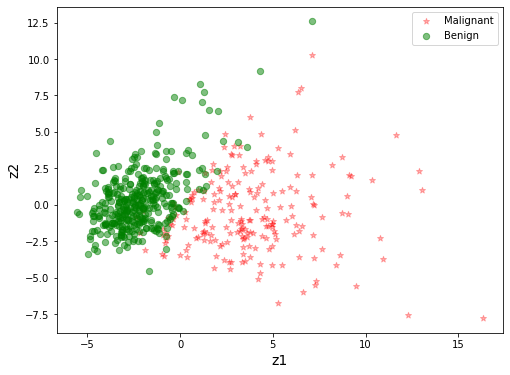

In [16]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
pca.fit(x_scl)
x_pca = pca.transform(x_scl)

pc1, pc2 = x_pca[:,0], x_pca[:,1] 
cdict = {0:'red', 1:'green'}
labl = {0:'Malignant', 1:'Benign'}
mark = {0:'*', 1:'o'}
alpha = {0:.3, 1:.5}
fig, ax = plt.subplots(figsize=(8,6))

for label in np.unique(y):
    ix = np.where(y==label)
    ax.scatter(pc1[ix], pc2[ix], c=cdict[label], marker=mark[label],
               s=40, label=labl[label], alpha=alpha[label]) 
plt.xlabel("z1", fontsize=14) 
plt.ylabel("z2", fontsize=14) 
plt.legend() 
plt.show() 


### Print the explained variance ratio

In [11]:
exp_var_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio is: {np.sum(exp_var_ratio)}.")

Explained Variance Ratio is: 0.6324320765155946.


### Reconstruct back to original dimension
- Print shape of the reconstructed data
- Get mse between reconstructed data and scaled data Hint: It should be less than 0.4. Around 0.36

In [12]:
from sklearn.metrics import mean_squared_error

x_reconst = pca.inverse_transform(x_pca)
print(f"The shape of reconstructed dataset is: {x_reconst.shape}")
print(f"MSE between reconstructed dataset and scaled dataset is: {mean_squared_error(x_scl, x_reconst)}")

The shape of reconstructed dataset is: (569, 30)
MSE between reconstructed dataset and scaled dataset is: 0.36756792348440565


## Reduce all features to 3 components
    - Plot a 3D graph with pc1 as the x-axis, pc2 as the y-axis and pc3 as the z-axis
      - Use different points and colors for the "benign" and "malignant" points

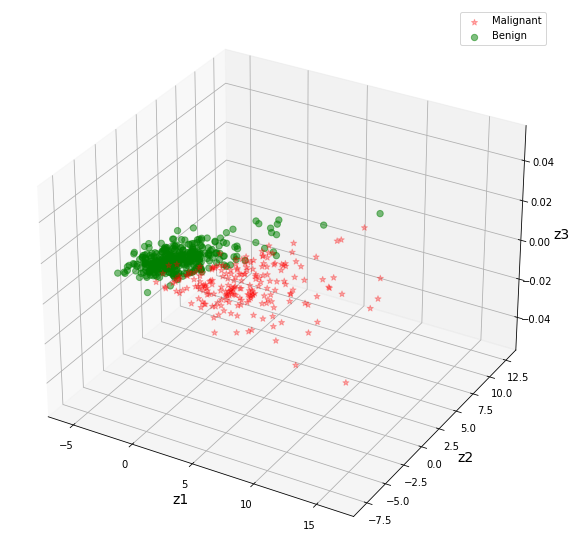

In [17]:
pca = PCA(n_components=3)
pca.fit(x_scl)
x_pca = pca.transform(x_scl)

pc1, pc2, pc3 = x_pca[:,0], x_pca[:,1], x_pca[:,2]
cdict = {0:'red', 1:'green'}
labl = {0:'Malignant', 1:'Benign'}
mark = {0:'*', 1:'o'}
alpha = {0:.3, 1:.5}
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(y):
    ix = np.where(y==label)
    ax.scatter(pc1[ix], pc2[ix], c=cdict[label], marker=mark[label],
               s=40, label=labl[label], alpha=alpha[label]) 
ax.set_xlabel("z1", fontsize=14) 
ax.set_ylabel("z2", fontsize=14) 
ax.set_zlabel("z3", fontsize=14)
ax.legend() 
plt.show() 

### Print the explained variance ratio

In [14]:
exp_var_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio is: {np.sum(exp_var_ratio)}.")

Explained Variance Ratio is: 0.7263637090898911.


### Reconstruct back to original dimension
- Print shape of the reconstructed data
- Get mse between reconstructed data and scaled data Hint: It should be less than 0.4. Around 0.36

In [15]:
x_reconst = pca.inverse_transform(x_pca)
print(f"The shape of reconstructed dataset is: {x_reconst.shape}")
print(f"MSE between reconstructed dataset and scaled dataset is: {mean_squared_error(x_scl, x_reconst)}")

The shape of reconstructed dataset is: (569, 30)
MSE between reconstructed dataset and scaled dataset is: 0.2736362909100927
